# Load Dataset and Model

In [1]:
import json
import pickle

import numpy as np
import pandas as pd

MODEL_PATH = '../model/model.pkl'
FEATURES_PATH = '../model/model_features.json'
MERGED_DATA = '../data/merged_data.csv'

# Load dataset
df = pd.read_csv(MERGED_DATA)

# Load model feature list
with open(FEATURES_PATH, 'r') as f:
    model_features = json.load(f)

# Load model
with open(MODEL_PATH, 'rb') as f:
    model = pickle.load(f)

In [2]:
len(model_features)

33

In [3]:
len(df.columns)

46

## Unused features

In [4]:
intersect = np.setdiff1d(df.columns.values, np.array(model_features))
intersect

array(['condition', 'grade', 'lat', 'long', 'price', 'property_age',
       'sqft_living15', 'sqft_lot15', 'view', 'waterfront', 'yr_built',
       'yr_renovated', 'yrs_since_last_improvement'], dtype=object)

In [5]:
len(intersect)

13

In [6]:
# Calculate the correlation matrix
corr = df.corr()

# Isolate the correlations with 'price'
price_correlations = corr['price']

# Filter columns where correlation with 'price' is greater than K
K = 0.1  # Set the threshold for correlation
high_corr_columns = price_correlations[abs(price_correlations) > K].index.tolist()

# Removing 'price' from the list to focus on other features
high_corr_columns.remove('price')

print("Columns with correlation to 'price' greater than", K, ":", high_corr_columns)

Columns with correlation to 'price' greater than 0.1 : ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15', 'yrs_since_last_improvement', 'ppltn_qty', 'farm_ppltn_qty', 'non_farm_qty', 'medn_hshld_incm_amt', 'medn_incm_per_prsn_amt', 'hous_val_amt', 'edctn_less_than_9_qty', 'edctn_9_12_qty', 'edctn_high_schl_qty', 'edctn_some_clg_qty', 'edctn_assoc_dgre_qty', 'edctn_bchlr_dgre_qty', 'edctn_prfsnl_qty', 'per_less_than_9', 'per_9_to_12', 'per_hsd', 'per_some_clg', 'per_assoc', 'per_bchlr', 'per_prfsnl']


In [7]:
np.setdiff1d(np.array(high_corr_columns), np.array(model_features))

array(['grade', 'lat', 'sqft_living15', 'view', 'waterfront',
       'yr_renovated', 'yrs_since_last_improvement'], dtype='<U26')

In [8]:
df[model_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,ppltn_qty,urbn_ppltn_qty,sbrbn_ppltn_qty,...,per_sbrbn,per_farm,per_non_farm,per_less_than_9,per_9_to_12,per_hsd,per_some_clg,per_assoc,per_bchlr,per_prfsnl
0,3,1.00,1180,5650,1.0,1180,0,21956.0,21956.0,0.0,...,0.0,0.0,0.0,4.0,8.0,20.0,21.0,5.0,12.0,4.0
1,3,2.25,2570,7242,2.0,2170,400,34926.0,34926.0,0.0,...,0.0,0.0,0.0,2.0,5.0,15.0,20.0,5.0,20.0,12.0
2,2,1.00,770,10000,1.0,770,0,18194.0,18194.0,0.0,...,0.0,0.0,0.0,1.0,4.0,13.0,20.0,6.0,19.0,9.0
3,4,3.00,1960,5000,1.0,1050,910,13969.0,13969.0,0.0,...,0.0,0.0,0.0,1.0,3.0,13.0,20.0,7.0,25.0,12.0
4,3,2.00,1680,8080,1.0,1680,0,23926.5,23298.0,0.0,...,0.0,0.0,0.0,1.0,5.0,15.0,19.0,5.0,19.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0,42011.0,42011.0,0.0,...,0.0,0.0,0.0,0.0,3.0,9.0,16.0,5.0,33.0,17.0
21609,4,2.50,2310,5813,2.0,2310,0,25593.0,25593.0,0.0,...,0.0,0.0,0.0,5.0,11.0,21.0,18.0,5.0,10.0,4.0
21610,2,0.75,1020,1350,2.0,1020,0,25067.0,25067.0,0.0,...,0.0,0.0,0.0,8.0,10.0,15.0,15.0,5.0,16.0,9.0
21611,3,2.50,1600,2388,2.0,1600,0,22271.0,18009.0,0.0,...,0.0,0.0,19.0,1.0,3.0,12.0,17.0,6.0,24.0,11.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       21613 non-null  float64
 1   bedrooms                    21613 non-null  int64  
 2   bathrooms                   21613 non-null  float64
 3   sqft_living                 21613 non-null  int64  
 4   sqft_lot                    21613 non-null  int64  
 5   floors                      21613 non-null  float64
 6   waterfront                  21613 non-null  int64  
 7   view                        21613 non-null  int64  
 8   condition                   21613 non-null  int64  
 9   grade                       21613 non-null  int64  
 10  sqft_above                  21613 non-null  int64  
 11  sqft_basement               21613 non-null  int64  
 12  yr_built                    21613 non-null  int64  
 13  yr_renovated                216

# Model Performance on KC House Data 

In [10]:
X = df[model_features]
y = df['price']

In [11]:
y_pred = model.predict(X)

In [12]:
performance_summary = []

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)

# Calculate mean absolute error
mae = mean_absolute_error(y, y_pred)

print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y, y_pred)

print("R-squared Score:", r2)

performance_summary.append({
    'model': "KNN (POC's)",
    'case': 'Price Prediction - Model Features - All Examples',
    'mse': mse,
    'rmse': rmse,
    'mae': mae,
    'r2': r2,
})

Mean Squared Error: 25605488008.409992
Mean Absolute Error: 82689.36169897747
R-squared Score: 0.8100146837149076


## Error Analysis

In [14]:
df_errors = df[['lat','long','price']].copy()
df_errors['predicted_price'] = y_pred
df_errors['price_error']= df_errors['predicted_price'] - df_errors['price']
df_errors['price_error_pctg']= 100*(df_errors['predicted_price'] - df_errors['price'])/df['price']

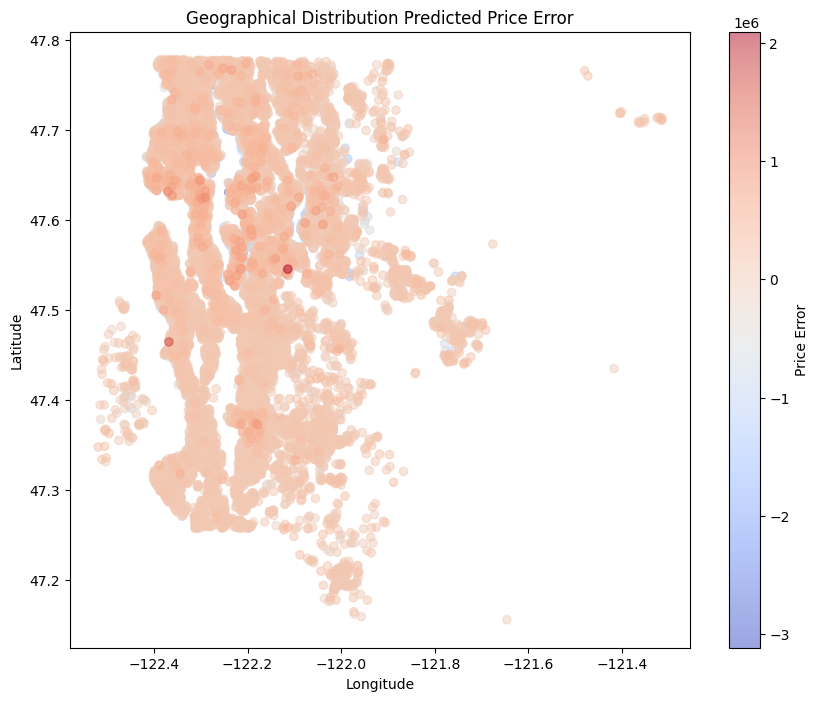

In [15]:
import matplotlib.pyplot as plt

data = df_errors.sort_values('price_error', ascending=True)

# Assuming 'data' is your DataFrame containing 'long', 'lat', and 'price'
plt.figure(figsize=(10, 8))

# Adding the alpha parameter to adjust transparency
sc = plt.scatter(data['long'], data['lat'], c=data['price_error'], cmap='coolwarm', alpha=0.5)

plt.title('Geographical Distribution Predicted Price Error')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adding a color bar to represent prices
plt.colorbar(sc, label='Price Error')

plt.show()

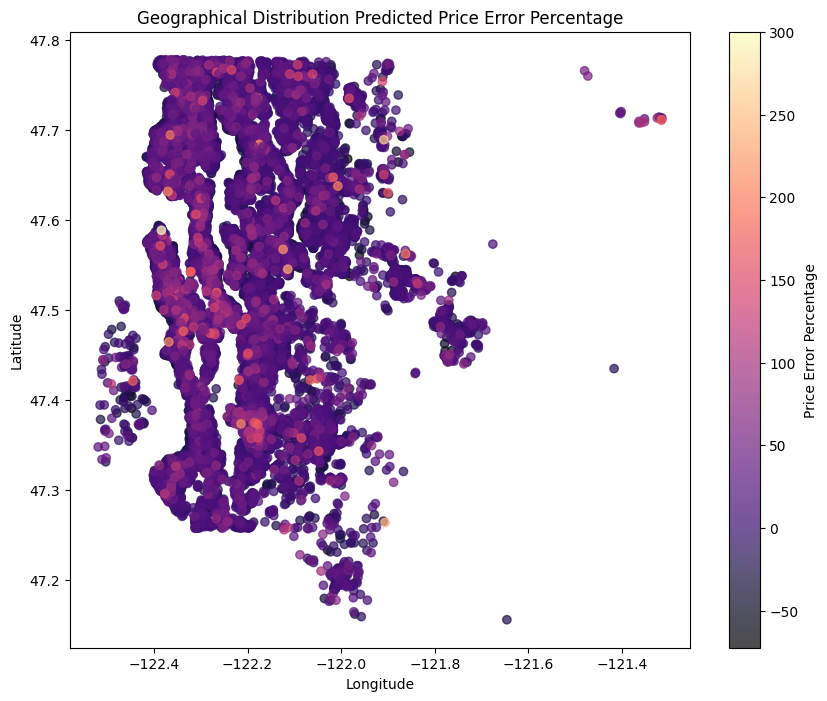

In [16]:
import matplotlib.pyplot as plt

data = df_errors.sort_values('price_error', ascending=True)

# Assuming 'data' is your DataFrame containing 'long', 'lat', and 'price'
plt.figure(figsize=(10, 8))

# Adding the alpha parameter to adjust transparency
sc = plt.scatter(data['long'], data['lat'], c=data['price_error_pctg'], cmap='magma', alpha=0.7)

plt.title('Geographical Distribution Predicted Price Error Percentage')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adding a color bar to represent prices
plt.colorbar(sc, label='Price Error Percentage')

plt.show()

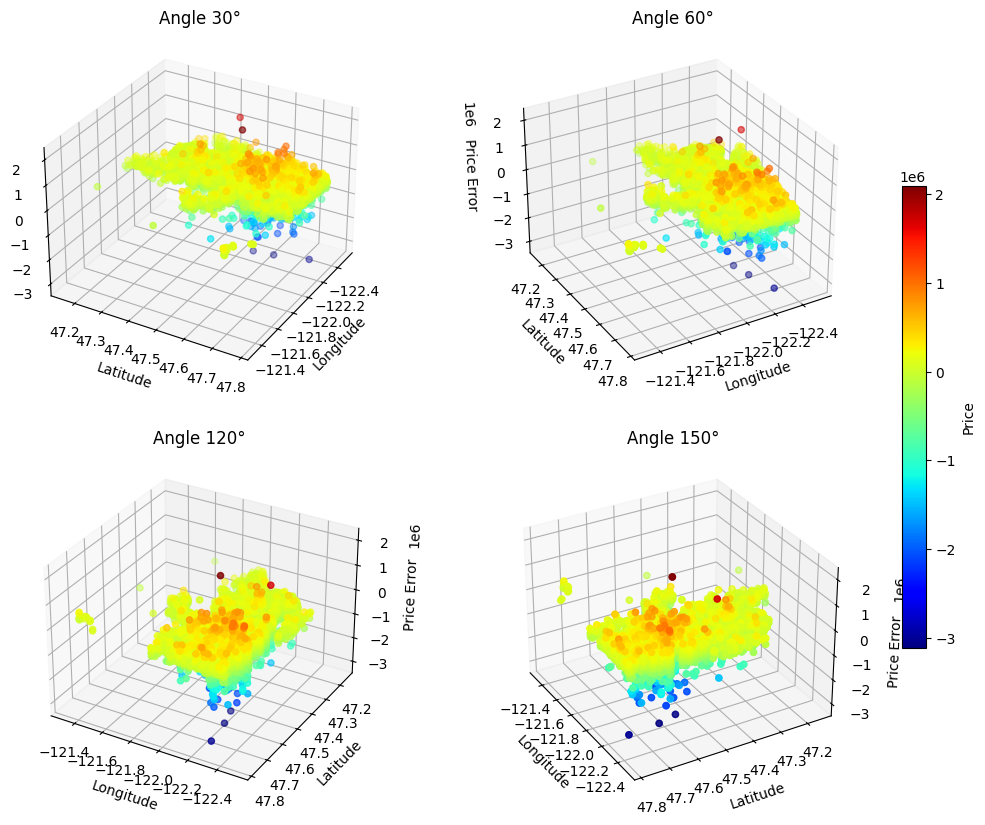

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data' is your DataFrame and it has been loaded previously.
data = df_errors  # Example DataFrame loading step, uncomment and replace with actual data loading if needed.

# Creating 4 subplots from different angles in a 2x2 grid
fig = plt.figure(figsize=(14, 10))

angles = [30, 60, 120, 150]
titles = ['Angle 30°', 'Angle 60°', 'Angle 120°', 'Angle 150°']

for i, angle in enumerate(angles, start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.scatter(data['long'], data['lat'], data['price_error'], c=data['price_error'], cmap='jet', marker='o')
    ax.view_init(30, angle)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Price Error')
    ax.set_title(titles[i-1])

plt.colorbar(ax.scatter(data['long'], data['lat'], data['price_error'], c=data['price_error'], cmap='jet', marker='o'), ax=fig.axes, shrink=0.6, label='Price')
plt.show()

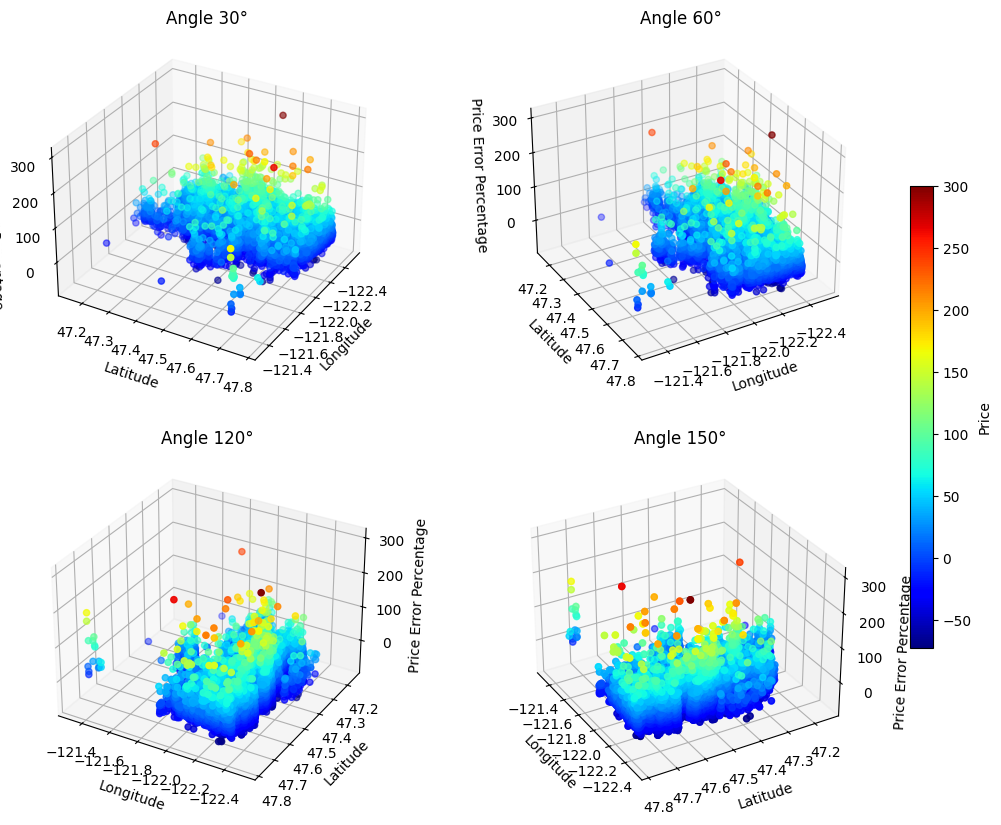

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data' is your DataFrame and it has been loaded previously.
data = df_errors  # Example DataFrame loading step, uncomment and replace with actual data loading if needed.

# Creating 4 subplots from different angles in a 2x2 grid
fig = plt.figure(figsize=(14, 10))

angles = [30, 60, 120, 150]
titles = ['Angle 30°', 'Angle 60°', 'Angle 120°', 'Angle 150°']

for i, angle in enumerate(angles, start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.scatter(data['long'], data['lat'], data['price_error_pctg'], c=data['price_error_pctg'], cmap='jet', marker='o')
    ax.view_init(30, angle)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Price Error Percentage')
    ax.set_title(titles[i-1])

plt.colorbar(ax.scatter(data['long'], data['lat'], data['price_error_pctg'], c=data['price_error_pctg'], cmap='jet', marker='o'), ax=fig.axes, shrink=0.6, label='Price')
plt.show()

## Model Generalization Analysis

In [19]:
import numpy as np
from sklearn import model_selection
from sklearn import neighbors
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select model features
X = df[model_features]
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Define the model
model = pipeline.make_pipeline(
    preprocessing.RobustScaler(),
    neighbors.KNeighborsRegressor()
)

# Perform 10-fold cross-validation
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_array):
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Print average scores
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average R2:", np.mean(r2_scores))

performance_summary.append({
    'model': "KNN (POC's)",
    'case': '10-fold Cross Validation - Model Features',
    'mse': mse,
    'rmse': rmse,
    'mae': mae,
    'r2': r2,
})

Average MSE: 33226673237.079376
Average RMSE: 181808.09902637516
Average MAE: 95383.68832135224
Average R2: 0.751921641431012


## Making Some Improvements

### Feature Engineering

In [20]:
# A new feature from yr_built
df['property_age'] = max(df['yr_built']) - df['yr_built']

# A new feature from yr_renovated
# Rationale: yrs_since_last_improvement = max(yr_built) - (yr_renovated OR yr_built if yr_renovated == 0)
df['yrs_since_last_improvement'] = max(df['yr_built']) - df[['yr_built', 'yr_renovated']].max(axis=1)

#### Adding feature 'property_age'

In [21]:
import numpy as np
from sklearn import model_selection
from sklearn import neighbors
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select model features
X = df[model_features + ['property_age']]
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Define the model
model = pipeline.make_pipeline(
    preprocessing.RobustScaler(),
    neighbors.KNeighborsRegressor()
)

# Perform 10-fold cross-validation
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_array):
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Print average scores
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average R2:", np.mean(r2_scores))

performance_summary.append({
    'model': "KNN (POC's)",
    'case': "10-fold Cross Validation - Model Features + 'property_age'",
    'mse': np.mean(mse_scores),
    'rmse': np.mean(rmse_scores),
    'mae': np.mean(mae_scores),
    'r2': np.mean(r2_scores),
})

Average MSE: 33445969940.244843
Average RMSE: 182389.12902707275
Average MAE: 94945.55550609341
Average R2: 0.7504859375451153


#### Adding feature 'yrs_since_last_improvemet'

In [22]:
import numpy as np
from sklearn import model_selection
from sklearn import neighbors
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select model features
X = df[model_features + ['yrs_since_last_improvement']]
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Define the model
model = pipeline.make_pipeline(
    preprocessing.RobustScaler(),
    neighbors.KNeighborsRegressor()
)

# Perform 10-fold cross-validation
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_array):
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Print average scores
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average R2:", np.mean(r2_scores))

performance_summary.append({
    'model': "KNN (POC's)",
    'case': "10-fold Cross Validation - Model Features + 'yrs_since_last_improvement'",
     'mse': np.mean(mse_scores),
    'rmse': np.mean(rmse_scores),
    'mae': np.mean(mae_scores),
    'r2': np.mean(r2_scores),
})

Average MSE: 33094173878.26103
Average RMSE: 181411.7272841523
Average MAE: 94790.43908364621
Average R2: 0.7530366529773344


In [23]:
import numpy as np
from sklearn import model_selection
from sklearn import neighbors
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select model features
X = df[model_features + ['yrs_since_last_improvement', 'property_age']]
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Define the model
model = pipeline.make_pipeline(
    preprocessing.RobustScaler(),
    neighbors.KNeighborsRegressor()
)

# Perform 10-fold cross-validation
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_array):
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Print average scores
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average R2:", np.mean(r2_scores))

performance_summary.append({
    'model': "KNN (POC's)",
    'case': "10-fold Cross Validation - Model Features + 'property_age' + 'yrs_since_last_improvement'",
     'mse': np.mean(mse_scores),
    'rmse': np.mean(rmse_scores),
    'mae': np.mean(mae_scores),
    'r2': np.mean(r2_scores),
})

Average MSE: 33170787239.010567
Average RMSE: 181600.28419262133
Average MAE: 94510.34960226723
Average R2: 0.752730115721151


#### Using all features

In [24]:
import numpy as np
from sklearn import model_selection
from sklearn import neighbors
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select model features
X = df.drop(['price'], axis=1)
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Define the model
model = pipeline.make_pipeline(
    preprocessing.RobustScaler(),
    neighbors.KNeighborsRegressor()
)

# Perform 10-fold cross-validation
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_array):
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Print average scores
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average R2:", np.mean(r2_scores))

performance_summary.append({
    'model': "KNN (POC's)",
    'case': "10-fold Cross Validation - All Features",
     'mse': np.mean(mse_scores),
    'rmse': np.mean(rmse_scores),
    'mae': np.mean(mae_scores),
    'r2': np.mean(r2_scores),
})

Average MSE: 27876721324.806183
Average RMSE: 166258.09195345367
Average MAE: 83242.26010136807
Average R2: 0.7938515006290092


#### Removing features with correlation smaller than 0.1

In [25]:
# Calculate the correlation matrix
corr = df.corr()

# Isolate the correlations with 'price'
price_correlations = corr['price']

# Filter columns where correlation with 'price' is greater than K
K = 0.1  # Set the threshold for correlation
high_corr_columns = price_correlations[abs(price_correlations) > K].index.tolist()

# Removing 'price' from the list to focus on other features
high_corr_columns.remove('price')

print("Columns with correlation to 'price' greater than", K, ":", high_corr_columns)

Columns with correlation to 'price' greater than 0.1 : ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15', 'yrs_since_last_improvement', 'ppltn_qty', 'farm_ppltn_qty', 'non_farm_qty', 'medn_hshld_incm_amt', 'medn_incm_per_prsn_amt', 'hous_val_amt', 'edctn_less_than_9_qty', 'edctn_9_12_qty', 'edctn_high_schl_qty', 'edctn_some_clg_qty', 'edctn_assoc_dgre_qty', 'edctn_bchlr_dgre_qty', 'edctn_prfsnl_qty', 'per_less_than_9', 'per_9_to_12', 'per_hsd', 'per_some_clg', 'per_assoc', 'per_bchlr', 'per_prfsnl']


In [26]:
import numpy as np
from sklearn import model_selection
from sklearn import neighbors
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select model features
X = df[high_corr_columns]
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Define the model
model = pipeline.make_pipeline(
    preprocessing.RobustScaler(),
    neighbors.KNeighborsRegressor()
)

# Perform 10-fold cross-validation
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_array):
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Print average scores
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average R2:", np.mean(r2_scores))

performance_summary.append({
    'model': "KNN (POC's)",
    'case': "10-fold Cross Validation - High Correlation Features (k=0.1)",
     'mse': np.mean(mse_scores),
    'rmse': np.mean(rmse_scores),
    'mae': np.mean(mae_scores),
    'r2': np.mean(r2_scores),
})

Average MSE: 26260058709.563835
Average RMSE: 161296.71789388586
Average MAE: 82714.01256091823
Average R2: 0.8060327642097691


#### Removing features with correlation smaller than 0.2

In [27]:
# Calculate the correlation matrix
corr = df.corr()

# Isolate the correlations with 'price'
price_correlations = corr['price']

# Filter columns where correlation with 'price' is greater than K
K = 0.2  # Set the threshold for correlation
high_corr_columns = price_correlations[abs(price_correlations) > K].index.tolist()

# Removing 'price' from the list to focus on other features
high_corr_columns.remove('price')

print("Columns with correlation to 'price' greater than", K, ":", high_corr_columns)

Columns with correlation to 'price' greater than 0.2 : ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'medn_hshld_incm_amt', 'medn_incm_per_prsn_amt', 'hous_val_amt', 'edctn_less_than_9_qty', 'edctn_9_12_qty', 'edctn_high_schl_qty', 'edctn_bchlr_dgre_qty', 'edctn_prfsnl_qty', 'per_less_than_9', 'per_9_to_12', 'per_hsd', 'per_assoc', 'per_bchlr', 'per_prfsnl']


In [28]:
import numpy as np
from sklearn import model_selection
from sklearn import neighbors
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select model features
X = df[high_corr_columns]
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Define the model
model = pipeline.make_pipeline(
    preprocessing.RobustScaler(),
    neighbors.KNeighborsRegressor()
)

# Perform 10-fold cross-validation
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_array):
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Print average scores
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average R2:", np.mean(r2_scores))

performance_summary.append({
    'model': "KNN (POC's)",
    'case': "10-fold Cross Validation - High Correlation Features (K = 0.2)",
     'mse': np.mean(mse_scores),
    'rmse': np.mean(rmse_scores),
    'mae': np.mean(mae_scores),
    'r2': np.mean(r2_scores),
})

Average MSE: 23372810767.458805
Average RMSE: 152165.69052117906
Average MAE: 80792.37355737333
Average R2: 0.8273366199796148


#### Trying new models

In [29]:
import time
import numpy as np
from sklearn import model_selection
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'KNN': pipeline.make_pipeline(
        preprocessing.RobustScaler(),
        neighbors.KNeighborsRegressor()
    ),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
}

# Select model features
X = df[high_corr_columns]
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Perform 10-fold cross-validation for each model
for name, model in models.items():
    print(f"Model: {name}")
    start_time = time.time()
    kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Lists to store evaluation metrics
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []
    
    for train_index, test_index in kf.split(X_array):
        x_train, x_test = X_array[train_index], X_array[test_index]
        y_train, y_test = y_array[train_index], y_array[test_index]
        
        # Define the pipeline with preprocessing steps if needed
        pipeline_steps = [
            ('scaler', preprocessing.RobustScaler()),
            ('model', model)
        ]
        
        # Create pipeline
        model_pipeline = pipeline.Pipeline(pipeline_steps)
        
        # Fit the model
        model_pipeline.fit(x_train, y_train)
        
        # Predict
        y_pred = model_pipeline.predict(x_test)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Append scores to lists
        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
    
    # Print average scores for the model
    print("Average MSE:", np.mean(mse_scores))
    print("Average MAE:", np.mean(mae_scores))
    print("Average RMSE:", np.mean(rmse_scores))
    print("Average R2:", np.mean(r2_scores))
    print("Time taken:", round(time.time() - start_time, 2), "seconds")
    print("\n")

    performance_summary.append({
        'model': f"{name}",
        'case': "10-fold Cross Validation - High Correlation Features (k=0.2)",
         'mse': np.mean(mse_scores),
        'rmse': np.mean(rmse_scores),
        'mae': np.mean(mae_scores),
        'r2': np.mean(r2_scores),
    })

Model: Linear Regression
Average MSE: 29707706666.01778
Average MAE: 105714.36309974443
Average RMSE: 171497.97977552353
Average R2: 0.7810755591791411
Time taken: 0.8 seconds


Model: Ridge Regression
Average MSE: 29706520123.440685
Average MAE: 105692.54741788672
Average RMSE: 171494.09439483538
Average R2: 0.7810859219549867
Time taken: 0.6 seconds


Model: Random Forest
Average MSE: 16408014193.656317
Average MAE: 71468.91322138066
Average RMSE: 127660.18519602684
Average R2: 0.8781823997529667
Time taken: 158.06 seconds


Model: Gradient Boosting
Average MSE: 16778978709.284082
Average MAE: 75982.06339616913
Average RMSE: 129227.48215057507
Average R2: 0.8750497477761489
Time taken: 36.32 seconds


Model: XGBoost
Average MSE: 17018708981.108135
Average MAE: 71880.94586820432
Average RMSE: 129647.12518392774
Average R2: 0.8745809561364128
Time taken: 3.57 seconds


Model: KNN
Average MSE: 23372810767.458805
Average MAE: 80792.37355737333
Average RMSE: 152165.69052117906
Average R2:

In [35]:
import time
import numpy as np
from sklearn import model_selection
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'KNN': pipeline.make_pipeline(
        preprocessing.RobustScaler(),
        neighbors.KNeighborsRegressor()
    ),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
}

# Select model features
X = df.drop(['price'], axis=1)
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Perform 10-fold cross-validation for each model
for name, model in models.items():
    print(f"Model: {name}")
    start_time = time.time()
    kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Lists to store evaluation metrics
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []
    
    for train_index, test_index in kf.split(X_array):
        x_train, x_test = X_array[train_index], X_array[test_index]
        y_train, y_test = y_array[train_index], y_array[test_index]
        
        # Define the pipeline with preprocessing steps if needed
        pipeline_steps = [
            ('scaler', preprocessing.RobustScaler()),
            ('model', model)
        ]
        
        # Create pipeline
        model_pipeline = pipeline.Pipeline(pipeline_steps)
        
        # Fit the model
        model_pipeline.fit(x_train, y_train)
        
        # Predict
        y_pred = model_pipeline.predict(x_test)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Append scores to lists
        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
    
    # Print average scores for the model
    print("Average MSE:", np.mean(mse_scores))
    print("Average MAE:", np.mean(mae_scores))
    print("Average RMSE:", np.mean(rmse_scores))
    print("Average R2:", np.mean(r2_scores))
    print("Time taken:", round(time.time() - start_time, 2), "seconds")
    print("\n")

    performance_summary.append({
        'model': f"{name}",
        'case': "10-fold Cross Validation - All Features",
         'mse': np.mean(mse_scores),
        'rmse': np.mean(rmse_scores),
        'mae': np.mean(mae_scores),
        'r2': np.mean(r2_scores),
    })

Model: Linear Regression
Average MSE: 28184191189.743835
Average MAE: 102372.92435676695
Average RMSE: 167005.23418603893
Average R2: 0.7923688599575623
Time taken: 1.3 seconds


Model: Ridge Regression
Average MSE: 28262779915.1269
Average MAE: 102379.6016699798
Average RMSE: 167240.34240383861
Average R2: 0.7917859164214591
Time taken: 0.91 seconds


Model: Random Forest
Average MSE: 14992546578.10847
Average MAE: 66756.4012392308
Average RMSE: 122011.93357213373
Average R2: 0.8887662064497419
Time taken: 267.44 seconds


Model: Gradient Boosting
Average MSE: 15788259749.648418
Average MAE: 72833.27159958289
Average RMSE: 125304.22081285829
Average R2: 0.8824705355603344
Time taken: 63.22 seconds


Model: XGBoost
Average MSE: 14783529326.513676
Average MAE: 65546.37808457101
Average RMSE: 120685.53872723726
Average R2: 0.8910066606379324
Time taken: 2.89 seconds


Model: KNN
Average MSE: 27876721324.806183
Average MAE: 83242.26010136807
Average RMSE: 166258.09195345367
Average R2: 0.

In [36]:
import time
import numpy as np
from sklearn import model_selection
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'KNN': pipeline.make_pipeline(
        preprocessing.RobustScaler(),
        neighbors.KNeighborsRegressor()
    ),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
}

# Select model features
X = df[model_features]
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Perform 10-fold cross-validation for each model
for name, model in models.items():
    print(f"Model: {name}")
    start_time = time.time()
    kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Lists to store evaluation metrics
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []
    
    for train_index, test_index in kf.split(X_array):
        x_train, x_test = X_array[train_index], X_array[test_index]
        y_train, y_test = y_array[train_index], y_array[test_index]
        
        # Define the pipeline with preprocessing steps if needed
        pipeline_steps = [
            ('scaler', preprocessing.RobustScaler()),
            ('model', model)
        ]
        
        # Create pipeline
        model_pipeline = pipeline.Pipeline(pipeline_steps)
        
        # Fit the model
        model_pipeline.fit(x_train, y_train)
        
        # Predict
        y_pred = model_pipeline.predict(x_test)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Append scores to lists
        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
    
    # Print average scores for the model
    print("Average MSE:", np.mean(mse_scores))
    print("Average MAE:", np.mean(mae_scores))
    print("Average RMSE:", np.mean(rmse_scores))
    print("Average R2:", np.mean(r2_scores))
    print("Time taken:", round(time.time() - start_time, 2), "seconds")
    print("\n")

    performance_summary.append({
        'model': f"{name}",
        'case': "10-fold Cross Validation - Model Features",
         'mse': np.mean(mse_scores),
        'rmse': np.mean(rmse_scores),
        'mae': np.mean(mae_scores),
        'r2': np.mean(r2_scores),
    })

Model: Linear Regression
Average MSE: 36795391650.78143
Average MAE: 114605.1845401623
Average RMSE: 191178.04710615642
Average R2: 0.7273555872954623
Time taken: 0.96 seconds


Model: Ridge Regression
Average MSE: 36825055540.19854
Average MAE: 114545.08715336086
Average RMSE: 191249.10840896546
Average R2: 0.7271727933967341
Time taken: 0.68 seconds


Model: Random Forest
Average MSE: 27268603032.44826
Average MAE: 88837.87224965097
Average RMSE: 164691.0245771967
Average R2: 0.7957260528165307
Time taken: 144.05 seconds


Model: Gradient Boosting
Average MSE: 27395073841.12441
Average MAE: 90909.83158929246
Average RMSE: 165088.48077773125
Average R2: 0.7948529684609147
Time taken: 35.28 seconds


Model: XGBoost
Average MSE: 29647912738.548637
Average MAE: 90143.7636269902
Average RMSE: 171757.77489065027
Average R2: 0.7779680161794224
Time taken: 2.5 seconds


Model: KNN
Average MSE: 33226673237.079376
Average MAE: 95383.68832135224
Average RMSE: 181808.09902637516
Average R2: 0.75

In [37]:
import time
import numpy as np
from sklearn import model_selection
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'KNN': pipeline.make_pipeline(
        preprocessing.RobustScaler(),
        neighbors.KNeighborsRegressor()
    ),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
}

# Select model features
X = df.drop(['price', 'yrs_since_last_improvement', 'property_age'], axis=1)
y = df['price']

# Convert DataFrame to numpy array
X_array = X.values
y_array = y.values

# Perform 10-fold cross-validation for each model
for name, model in models.items():
    print(f"Model: {name}")
    start_time = time.time()
    kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Lists to store evaluation metrics
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []
    
    for train_index, test_index in kf.split(X_array):
        x_train, x_test = X_array[train_index], X_array[test_index]
        y_train, y_test = y_array[train_index], y_array[test_index]
        
        # Define the pipeline with preprocessing steps if needed
        pipeline_steps = [
            ('scaler', preprocessing.RobustScaler()),
            ('model', model)
        ]
        
        # Create pipeline
        model_pipeline = pipeline.Pipeline(pipeline_steps)
        
        # Fit the model
        model_pipeline.fit(x_train, y_train)
        
        # Predict
        y_pred = model_pipeline.predict(x_test)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Append scores to lists
        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
    
    # Print average scores for the model
    print("Average MSE:", np.mean(mse_scores))
    print("Average MAE:", np.mean(mae_scores))
    print("Average RMSE:", np.mean(rmse_scores))
    print("Average R2:", np.mean(r2_scores))
    print("Time taken:", round(time.time() - start_time, 2), "seconds")
    print("\n")

    performance_summary.append({
        'model': f"{name}",
        'case': "10-fold Cross Validation - All Features - 'property_age' - 'yrs_since_last_improvement'",
         'mse': np.mean(mse_scores),
        'rmse': np.mean(rmse_scores),
        'mae': np.mean(mae_scores),
        'r2': np.mean(r2_scores),
    })

Model: Linear Regression
Average MSE: 28176589888.906372
Average MAE: 102368.7126898197
Average RMSE: 166981.06568821025
Average R2: 0.7924279901556484
Time taken: 1.29 seconds


Model: Ridge Regression
Average MSE: 28255080422.705925
Average MAE: 102374.56510526399
Average RMSE: 167216.03664659697
Average R2: 0.7918454956353584
Time taken: 0.9 seconds


Model: Random Forest
Average MSE: 14891231470.092438
Average MAE: 66842.79304284963
Average RMSE: 121623.02909847761
Average R2: 0.8894294002574237
Time taken: 253.24 seconds


Model: Gradient Boosting
Average MSE: 15921040073.852499
Average MAE: 72924.45294452002
Average RMSE: 125839.41358794206
Average R2: 0.8814796268011105
Time taken: 64.36 seconds


Model: XGBoost
Average MSE: 14635522713.23708
Average MAE: 65456.885860532
Average RMSE: 119942.32829251303
Average R2: 0.8924128342938678
Time taken: 4.27 seconds


Model: KNN
Average MSE: 27847628002.063927
Average MAE: 83420.6611297747
Average RMSE: 166180.6582064145
Average R2: 0.7

In [38]:
df_prfc = pd.DataFrame(performance_summary)

In [39]:
df_prfc.sort_values('r2', ascending=False).reset_index()

,index,model,case,mse,rmse,mae,r2
0,37,XGBoost,10-fold Cross Validation - All Features - 'pro...,1.463552e+10,119942.328293,65456.885861,0.892413
1,21,XGBoost,10-fold Cross Validation - All Features,1.478353e+10,120685.538727,65546.378085,0.891007
2,35,Random Forest,10-fold Cross Validation - All Features - 'pro...,1.489123e+10,121623.029098,66842.793043,0.889429
3,19,Random Forest,10-fold Cross Validation - All Features,1.499255e+10,122011.933572,66756.401239,0.888766
4,20,Gradient Boosting,10-fold Cross Validation - All Features,1.578826e+10,125304.220813,72833.271600,0.882471
5,36,Gradient Boosting,10-fold Cross Validation - All Features - 'pro...,1.592104e+10,125839.413588,72924.452945,0.881480
6,10,Random Forest,10-fold Cross Validation - High Correlation Fe...,1.640801e+10,127660.185196,71468.913221,0.878182
7,11,Gradient Boosting,10-fold Cross Validation - High Correlation Fe...,1.677898e+10,129227.482151,75982.063396,0.875050
8,12,XGBoost,10-fold Cross Validation - High Correlation Fe...,1.701871e+10,129647.125184,71880.945868,0.874581
9,7,KNN (POC's),10-fold Cross Validation - High Correlation Fe...,2.337281e+10,152165.690521,80792.373557,0.827337


In [40]:
print(df_prfc[['model', 'case', 'r2']].sort_values('r2', ascending=False).reset_index()[['case','model']].values)

[["10-fold Cross Validation - All Features - 'property_age' - 'yrs_since_last_improvement'"
  'XGBoost']
 ['10-fold Cross Validation - All Features' 'XGBoost']
 ["10-fold Cross Validation - All Features - 'property_age' - 'yrs_since_last_improvement'"
  'Random Forest']
 ['10-fold Cross Validation - All Features' 'Random Forest']
 ['10-fold Cross Validation - All Features' 'Gradient Boosting']
 ["10-fold Cross Validation - All Features - 'property_age' - 'yrs_since_last_improvement'"
  'Gradient Boosting']
 ['10-fold Cross Validation - High Correlation Features (k=0.2)'
  'Random Forest']
 ['10-fold Cross Validation - High Correlation Features (k=0.2)'
  'Gradient Boosting']
 ['10-fold Cross Validation - High Correlation Features (k=0.2)'
  'XGBoost']
 ['10-fold Cross Validation - High Correlation Features (K = 0.2)'
  "KNN (POC's)"]
 ['10-fold Cross Validation - High Correlation Features (k=0.2)' 'KNN']
 ['Price Prediction - Model Features - All Examples' "KNN (POC's)"]
 ['10-fold Cro

In [41]:
df_prfc.to_csv('../data/performance_data.csv')